In [1]:
import torch
import numpy as np
from shape_space import ShapeSpace
from manifold_pca import ManifoldPCA
from sklearn.decomposition import PCA
from stats import optimize_frechet_mean, iterate_frechet_mean
import matplotlib.pyplot as plt
from pathlib import Path
import aist_helpers
from matplotlib import cm

%matplotlib widget

## Load data from AIST++

In [2]:
data_source = Path('data') / 'aist'

poses = aist_helpers.load_poses(data_source / 'gBR_sBM_cAll_d04_mBR0_ch06.pkl')
data = np.load(data_source / 'gBR_sBM_cAll_d04_mBR0_ch06.pkl', allow_pickle=True)
print(data.keys())

dict_keys(['keypoints3d', 'keypoints3d_optim'])


/var/folders/ph/lx9dyyx91893rxnlw09n7t0c0000gn/T/ipykernel_65816/1653418543.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


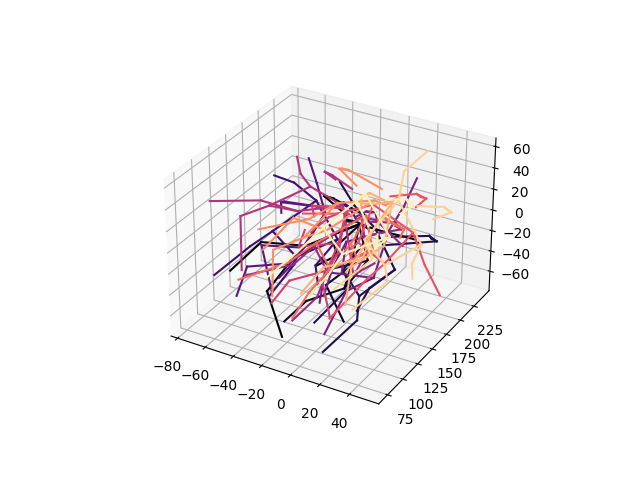

In [3]:
cmap = cm.get_cmap('magma')

plt.clf()
ax = plt.subplot(111, projection='3d')
for i, p in enumerate(poses):
    if i % 50 == 0:
        aist_helpers.plot_bones(p, ax, color=cmap(i / len(poses)))
plt.show()

## Make a ShapeSpace object for handling poses

In [4]:
manifold = ShapeSpace(num_keypoints=17, keypoints_dim=3)

__Calculate the mean pose of some movement__

naive mean pose is a tensor with shape torch.Size([17, 3])
frechet mean point is a tensor with shape torch.Size([17, 3])


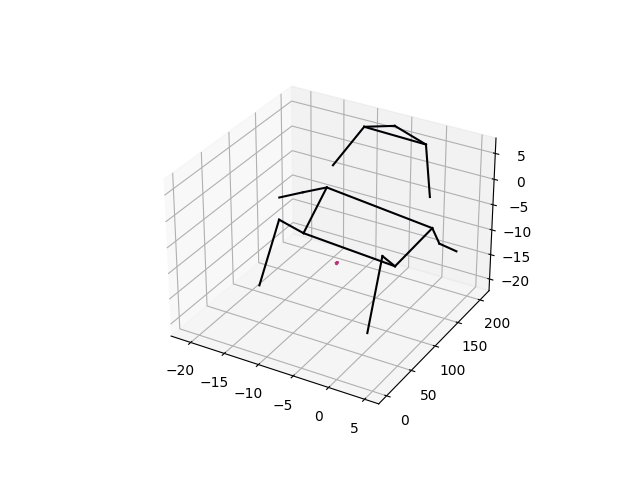

In [5]:
mean_pose_naive = torch.mean(poses, dim=0)
print("naive mean pose is a tensor with shape", mean_pose_naive.shape)

points = [manifold.project(p) for p in poses]
points = torch.stack(points, dim=0)
frechet_mean_pose = iterate_frechet_mean(manifold, points)
print("frechet mean point is a tensor with shape", frechet_mean_pose.shape)

plt.figure()
ax = plt.subplot(111, projection='3d')
aist_helpers.plot_bones(mean_pose_naive, ax, color=cmap(0))
aist_helpers.plot_bones(frechet_mean_pose, ax, color=cmap(0.5))
plt.show()

## Do PCA on a single movement sequence

In [ ]:
naive_pca = PCA(n_components=6)
naive_pca.fit(poses.reshape(-1, 17*3))

mani_pca = ManifoldPCA(manifold, n_components=6)
mani_pca.fit(points)

plt.figure()
plt.plot(naive_pca.singular_values_, label='naive')
plt.plot(mani_pca.singular_values_, label='manifold')

plt.xlabel('rank')
plt.ylabel('singular value AKA variance')
plt.legend()
plt.show()

/Users/richard/Research/notes/lab-teaching-geometry-shape-space/manifold_pca.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)


In [ ]:
naive_pca_transformed = naive_pca.transform(poses.reshape(-1, 17*3))
mani_transformed = mani_pca.transform(points)

plt.figure()
plt.plot(naive_pca_transformed[:, 0], naive_pca_transformed[:, 1], '-k', marker='.', label='naive')
plt.plot(mani_transformed[:, 0], mani_transformed[:, 1], '-k', marker='.', label='manifold')
plt.show()